### Exercise 1: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude)
and perform basic array operations.

Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), 
New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).

Convert the latitude and longitude values from degrees to radians using np.radians().

Calculate the element-wise difference between Tokyo and the other cities’ latitude and longitude in radians.

In [1]:
import numpy as np
cities = ['Tokyo', 'New York', 'London' , 'Paris']
location = [(35.6895, 139.6917),(40.7128, -74.0060),(51.5074, -0.1278),(48.8566, 2.3522)]
location_array=np.array(location)

np.set_printoptions(precision=10,suppress=True)
radian_array = np.radians(location_array)

tokyo_radians = radian_array[0]

difference_radians = radian_array - tokyo_radians

difference_radians
    

array([[ 0.          ,  0.          ],
       [ 0.0876731243, -3.7297284689],
       [ 0.2760744358, -2.4403106335],
       [ 0.2298092479, -2.397026468 ]])

### Exercise 2: Pandas DataFrame Operations with Geospatial Data

In this exercise, you’ll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

Load the world cities dataset from this URL using Pandas: opengeos/datasets

Display the first 5 rows and check for missing values.

Filter the dataset to only include cities with a population greater than 1 million.

Group the cities by their country and calculate the total population for each country.

Sort the cities by population in descending order and display the top 10 cities.

In [ ]:
import pandas as pd
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
filepath = "c:\\world_cities.csv"
df=pd.read_csv(filepath)
df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [3]:
filter_row = df[df.population > 1000000]
filter_row

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [6]:
#Group the cities by their country and calculate the total population for each country.

In [7]:
country_population=df.groupby('country')['population'].sum().reset_index()
country_population

,country,population
0,AFG,4931702
1,AGO,6821544
2,ALB,895350
3,ALD,10682
4,AND,53998
...,...,...
195,WSM,61916
196,YEM,3759000
197,ZAF,13373789
198,ZMB,2326947


Sort the cities by population in descending order and display the top 10 cities.

In [8]:
least10 = df.sort_values('population',ascending=False)
least10.head(10)

,id,name,country,latitude,longitude,population
1239,1240,Tokyo,JPN,35.68502,139.75141,35676000
1224,1225,New York,USA,40.74998,-73.98002,19040000
1230,1231,Mexico City,MEX,19.44244,-99.13099,19028000
1240,1241,Mumbai,IND,19.01699,72.85699,18978000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1148,1149,Delhi,IND,28.66999,77.23000,15926000
1238,1239,Shanghai,CHN,31.21645,121.43650,14987000
1243,1244,Kolkata,IND,22.49497,88.32468,14787000
1175,1176,Dhaka,BGD,23.72306,90.40858,12797394
1217,1218,Buenos Aires,ARG,-34.60250,-58.39753,12795000


# Exercise 3

In [9]:
import geopandas as gpd

url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"

gdf=gpd.read_file(url)
gdf.head()

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


<Axes: >

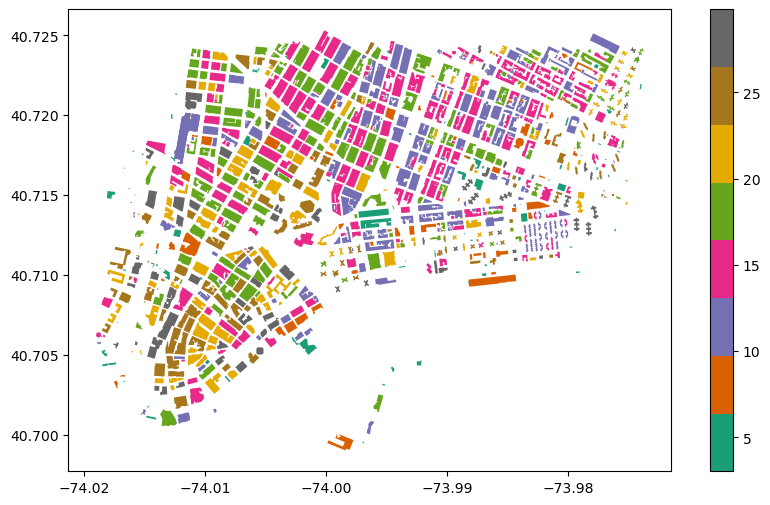

In [10]:
# Create a plot of the building footprints and color them based on the building height (use the height_MS column)
gdf.plot("height_MS", legend = True , figsize = (10,6),cmap='Dark2' )

In [11]:
# Create an interactive map of the building footprints and color them based on the building height (use the height_MS column)
gdf.explore("height_MS", legend = True)

In [12]:
# Calculate the average building height (use the height_MS column)

average_height=gdf["height_MS"].mean()

average_height

15.454691136974038

In [13]:
#Select buildings with a height greater than the average height.
selected_building = gdf[gdf["height_MS"] > average_height ]
selected_building

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
5,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."
...,...,...,...,...,...,...,...,...
1196,9714,19.90,19.15,19.52,1230.57,36,New York,"POLYGON ((-73.98328 40.71861, -73.9826 40.7184..."
1198,9752,19.35,NaN,19.35,4080.25,36,New York,"POLYGON ((-73.99528 40.70245, -73.99568 40.702..."
1199,9754,24.11,47.47,35.79,7137.13,36,New York,"POLYGON ((-74.00084 40.71547, -74.00075 40.715..."
1200,9756,16.20,15.17,15.68,166.41,36,New York,"POLYGON ((-73.99054 40.71271, -73.99045 40.712..."


<Axes: >

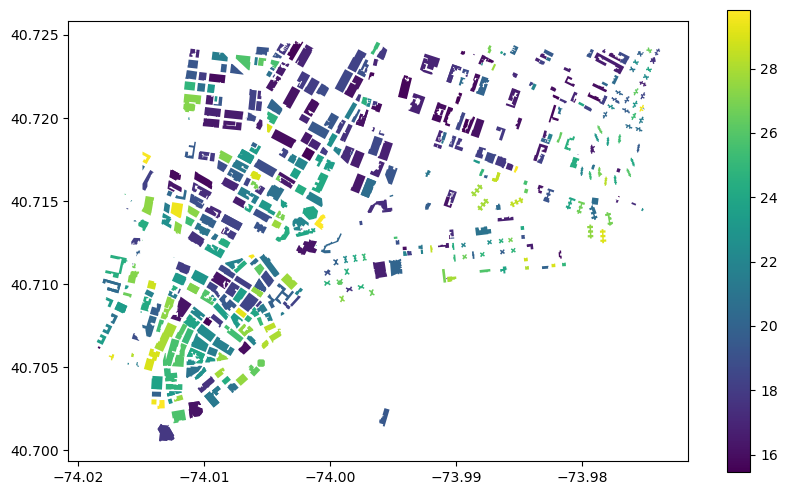

In [14]:
#plotting the buildings having height greater than average haveage_height
selected_building.plot("height_MS", legend = True, figsize = (10,6))

In [16]:
#Save the GeoDataFrame to a new GeoJSON file.
# write the geodata frame selected_buildings to file
selected_building.to_file("./selectedbuildings.GeoJSON")

In [17]:
#Testing the selected building geojson file
gfile = gpd.read_file("./selectedbuildings.GeoJSON")
gfile.head()

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
1,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
2,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
3,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
4,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."


Exercise 4: Combining NumPy, Pandas, and GeoPandas
This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

Use Pandas to load the world cities dataset from this URL: opengeos/datasets

Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).

Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.

Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).

Calculate the distance (in meters) between each city and the city of Paris.

Plot the cities on a world map, coloring the points by their distance from Paris.

In [22]:
newurl = 'https://github.com/opengeos/datasets/releases/download/world/world_cities.csv'
pdf=pd.read_csv(newurl)